#Sales Performance Dashboard: Global Trend and Product Analysis Using Python

Focus: Best sales visualization, customer analysis, and product insights.

🔍 Analysis Objectives

- Find sales trends from year to year and per month
- Identify products with the highest sales
- See who the customers are with the largest contributions
- Know the distribution of transaction sizes (deal sizes)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
try:
    df = pd.read_csv("/content/sales_data_sample.csv", encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' fails, try 'cp1252'
    df = pd.read_csv("/content/sales_data_sample.csv", encoding='cp1252')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [31]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['YEAR_ID'] = df['ORDERDATE'].dt.year
df['MONTH_ID'] = df['ORDERDATE'].dt.month

##1. Global Sales Trend

In [32]:
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
sales_by_month = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()

<ipython-input-33-37cdbc7c615a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_year, x='YEAR_ID', y='SALES', palette='Blues_d')


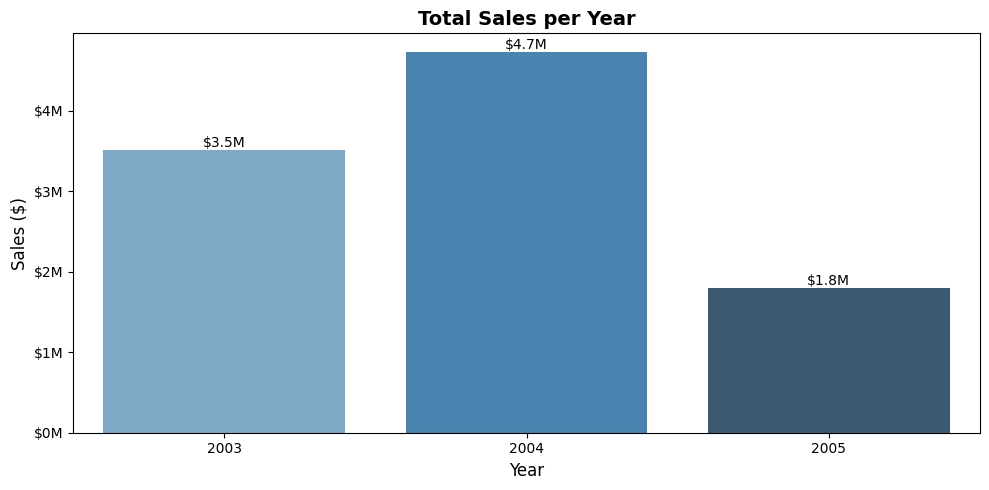

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=sales_by_year, x='YEAR_ID', y='SALES', palette='Blues_d')
plt.title('Total Sales per Year', fontsize=14, weight='bold')
plt.ylabel('Sales ($)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e6)}M'))
for p in ax.patches:
    ax.annotate(f'${p.get_height()/1e6:.1f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

Monthly trend by year

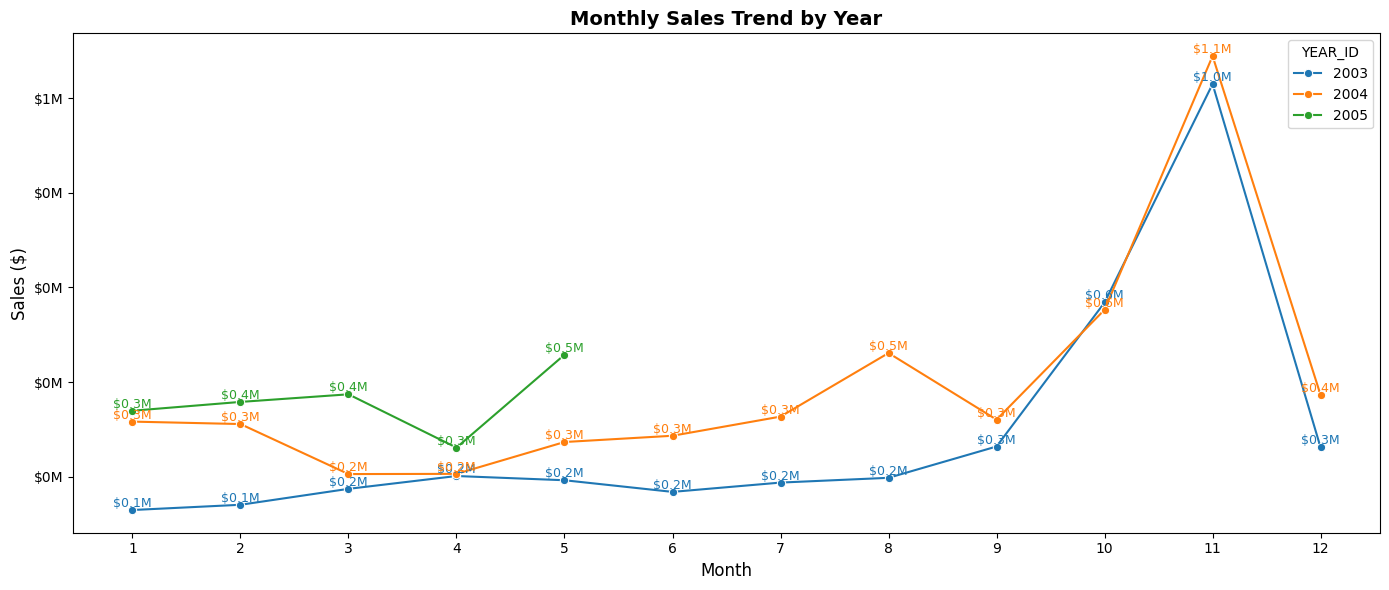

In [34]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=sales_by_month, x='MONTH_ID', y='SALES', hue='YEAR_ID', marker="o", palette='tab10')
plt.title('Monthly Sales Trend by Year', fontsize=14, weight='bold')
plt.ylabel('Sales ($)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1, 13))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e6)}M'))
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'${y/1e6:.1f}M', color=line.get_color(), fontsize=9, ha='center', va='bottom')
plt.tight_layout()
plt.show()

###Shows annual and seasonal revenue trends. Helps businesses see the best performing years and seasonal patterns (e.g. spikes in certain months).
It can be seen from the graph above that for total annual sales, the increase was in 2004. This can be an example of what campaign was carried out in 2004, and implemented in 2005.
Likewise with monthly sales, it can be seen that the sales increased the most sharply in November. Here it can be said that seasonal sales in that month can be done more in terms of stock provision. so that in the following year it is ready, there is no shortage of stock.

##2. Top Products

<ipython-input-35-7dcf3929226b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products, x='SALES', y='PRODUCTCODE', palette='viridis')


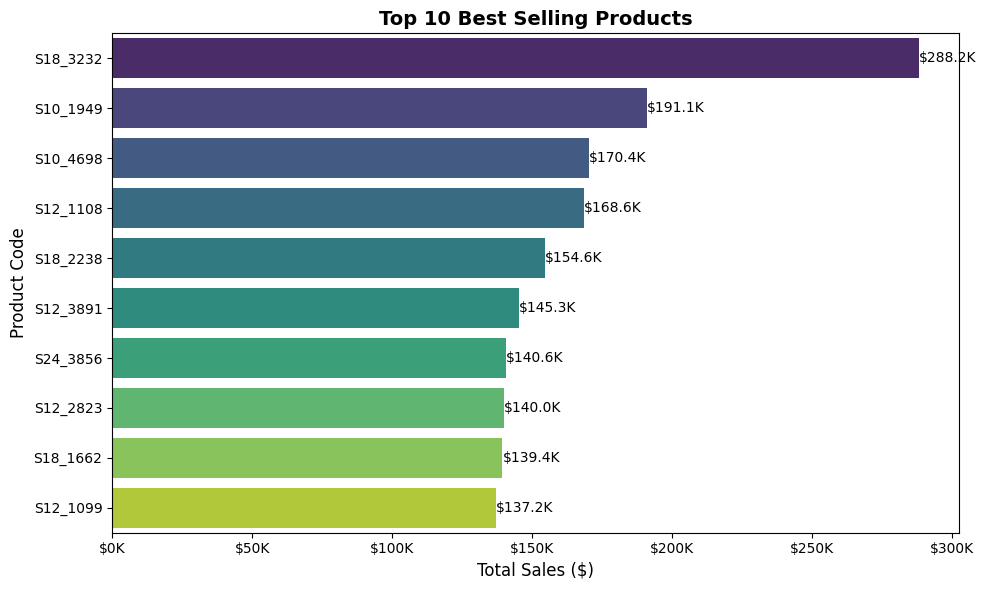

In [35]:
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_products, x='SALES', y='PRODUCTCODE', palette='viridis')
plt.title('Top 10 Best Selling Products', fontsize=14, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Code', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e3)}K'))
for p in ax.patches:
    ax.annotate(f'${p.get_width()/1e3:.1f}K', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

###Map the best-selling products that generate the highest revenue. Important for inventory decision making and marketing focus.
It can be seen from the graph that these are the 10 highest products that generate the most revenue. So for these 10 products, they should get important concerns in terms of quality so that customers who have bought them repeatedly are not disappointed.

##3. Customer Analysis

<ipython-input-36-6104fda440f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_customers, x='SALES', y='CUSTOMERNAME', palette='crest')


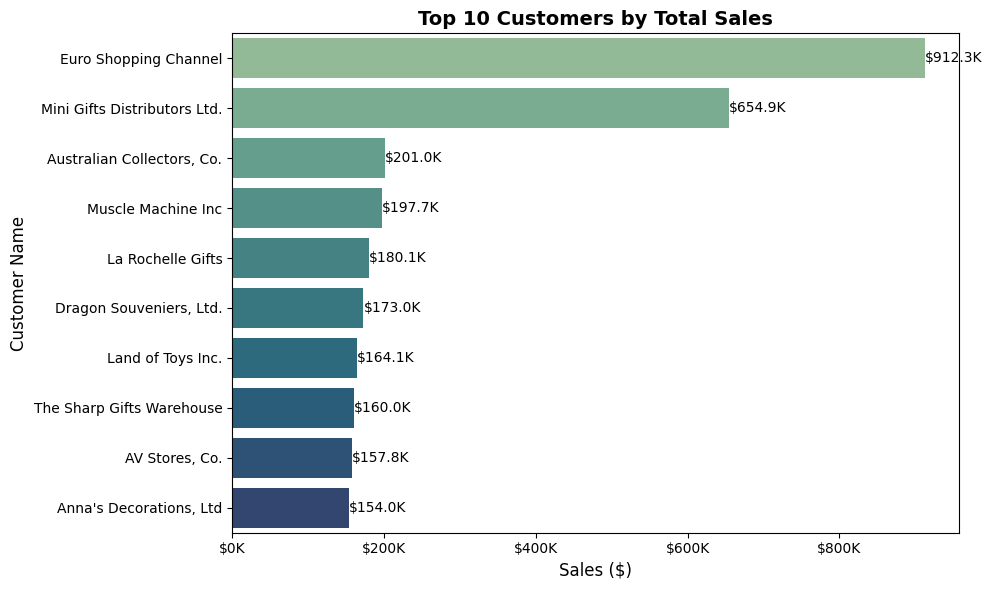

In [36]:
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_customers, x='SALES', y='CUSTOMERNAME', palette='crest')
plt.title('Top 10 Customers by Total Sales', fontsize=14, weight='bold')
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e3)}K'))
for p in ax.patches:
    ax.annotate(f'${p.get_width()/1e3:.1f}K', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

###Identify customers with the largest contribution to sales. Can be targeted for customer loyalty and exclusive promotions.
It can be seen that 10 customers who provide the largest income for the company can be targeted and offered to those 10 customers an exclusive member so that they can continue to make repeat orders.

##4. Deal Size Distribution

<ipython-input-37-721fad57db1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dealsize_dist, x='DEALSIZE', y='Count', palette='flare')


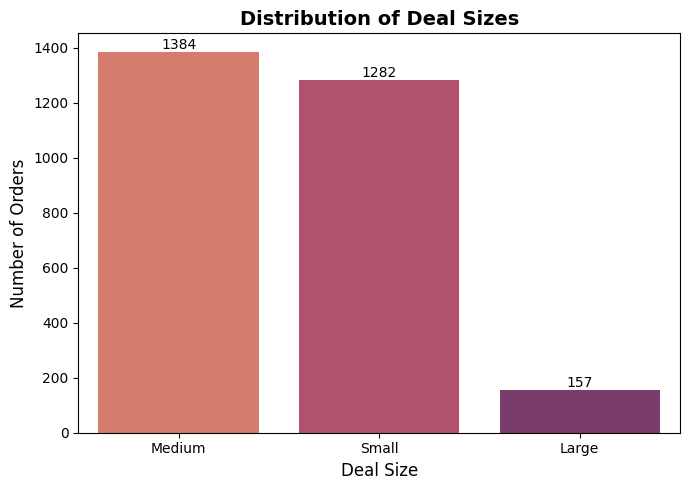

In [37]:
dealsize_dist = df['DEALSIZE'].value_counts().reset_index()
dealsize_dist.columns = ['DEALSIZE', 'Count']

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=dealsize_dist, x='DEALSIZE', y='Count', palette='flare')
plt.title('Distribution of Deal Sizes', fontsize=14, weight='bold')
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

###Provides an overview of the general scale of transactions. Can help sales teams understand customer segmentation based on transaction size.

##5. Regional Sales Analysis

<ipython-input-38-cac308ef1f2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_country, x='SALES', y='COUNTRY', palette='magma')


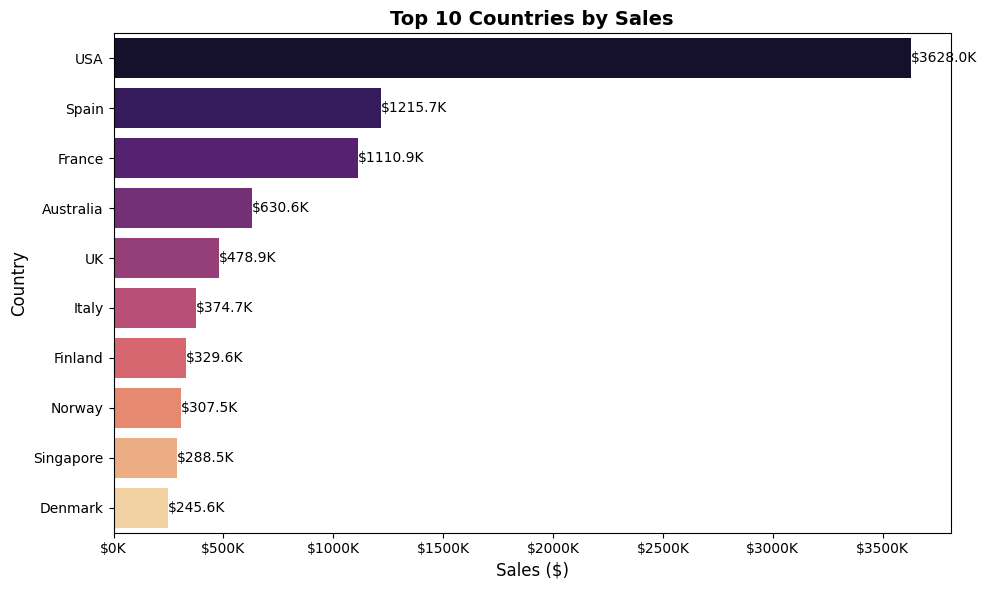

In [38]:
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_by_country, x='SALES', y='COUNTRY', palette='magma')
plt.title('Top 10 Countries by Sales', fontsize=14, weight='bold')
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e3)}K'))
for p in ax.patches:
    ax.annotate(f'${p.get_width()/1e3:.1f}K', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

###Shows the regions (countries) with the best sales performance. Important for market expansion or distribution decisions. It can be seen that these 10 countries have the best sales performance, so the company can continue to focus on these 10 countries to increase their respective sales.

##6. Profit Margin Analysis

<ipython-input-39-5baa83c150d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_profit_products, x='PROFIT', y='PRODUCTCODE', palette='rocket')


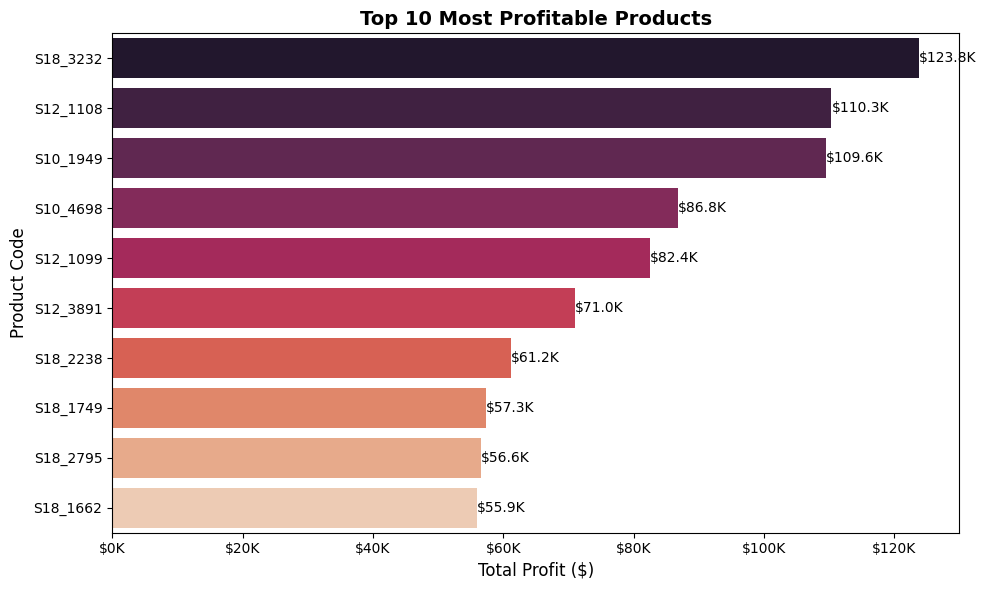

In [39]:
df['PROFIT'] = (df['MSRP'] - df['PRICEEACH']) * df['QUANTITYORDERED']
top_profit_products = df.groupby('PRODUCTCODE')['PROFIT'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_profit_products, x='PROFIT', y='PRODUCTCODE', palette='rocket')
plt.title('Top 10 Most Profitable Products', fontsize=14, weight='bold')
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Product Code', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x/1e3)}K'))
for p in ax.patches:
    ax.annotate(f'${p.get_width()/1e3:.1f}K', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

###Provides an overview of products that generate the highest profits. The focus of production and marketing can be directed to these products.
These are the top 10 products that can be given campaigns to further increase or improve sales. so that there is no mistake in doing promotions or campaigns.

##Conclusion:

Through this dashboard, we have managed to extract important insights from global sales data covering sales trends, product performance, customer behavior, and geographic region contributions. Some key points that can be concluded are:

1. Global Sales Trends show consistent seasonal fluctuations, with peak sales occurring in certain months such as November and December. This opens up opportunities for more aggressive seasonal promotion strategies.

2. Product Analysis reveals that several leading products consistently dominate sales and also generate high profit margins, indicating the importance of focusing on inventory and promotion of these products.

3. Key Customers contribute significantly to total sales. This loyalty and personalization approach to customers can increase retention and repeat orders.

4. Deal Size shows that the majority of orders are in the medium category, but the large category also contributes significantly to total revenue.

5. Region Analysis shows that certain countries significantly contribute high revenue, providing a basis for strengthening regional marketing strategies and market expansion.

6. Product Profitability emphasizes that high revenue is not always directly proportional to high profits, so business strategies need to consider profit margins when determining product focus.

##✅ Business Recommendations

1. Optimize Seasonal Sales Strategy

- Because there is a significant spike in sales in November and December, companies should increase stock and intensify promotions towards the end of the year. Discount programs, bundling, or special end-of-year campaigns can drive higher sales.

2. Focus on Top Performing Products

- Products with the highest sales and profit contributions need to be prioritized in marketing and distribution strategies. Consider expanding variants or complements to these products because they have been proven to have strong market appeal.

3. Build Key Customer Loyalty

- Some customers contribute large purchase volumes. Build long-term relationships with them through loyalty programs, personalized services, or exclusive contracts to maintain strategic customer retention.

4. Segmentation Based on Transaction Size

- Because the majority of transactions are in the medium and large deal size categories, sales strategies can be adjusted. Create special offers for large transactions and provide education or upselling for customers with small orders to move to larger segments.

5. Target the Highest Performing Countries

- The focus of expansion and distribution should be directed to countries with the highest contribution to sales. However, continue to evaluate competitors and market potential to expand into potential new areas.

6. Balance Revenue and Profit

- Not all high-selling products provide the best profit margins. Business focus needs to consider the balance between sales volume and profit margin to increase efficiency and ROI (Return on Investment).